In [39]:
#importing useful libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy import stats 

In [4]:
#Reading data..first step

path = "data/water_potability.csv"

df = pd.read_csv(path, sep =",")

df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
#Let's see how many null values we have.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [7]:
# Create a list of float colums to check for skewing
mask = df.dtypes == np.float
float_cols = df.columns[mask]

skew_limit = 0.75 # define a limit above which we will log transform
skew_vals = df[float_cols].skew()
skew_vals

ph                 0.025630
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.035947
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.083031
Turbidity         -0.007817
dtype: float64

I tried to mask null values but skewness of features are very low, so I need to find another way to solve missing value problem. I will put each columns' mean instead of the null value.

In [8]:
df.fillna(df.mean(), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


If potability has null value and is filled with mean, I will round that value, because potability is a boolean type, float value does not make sense.

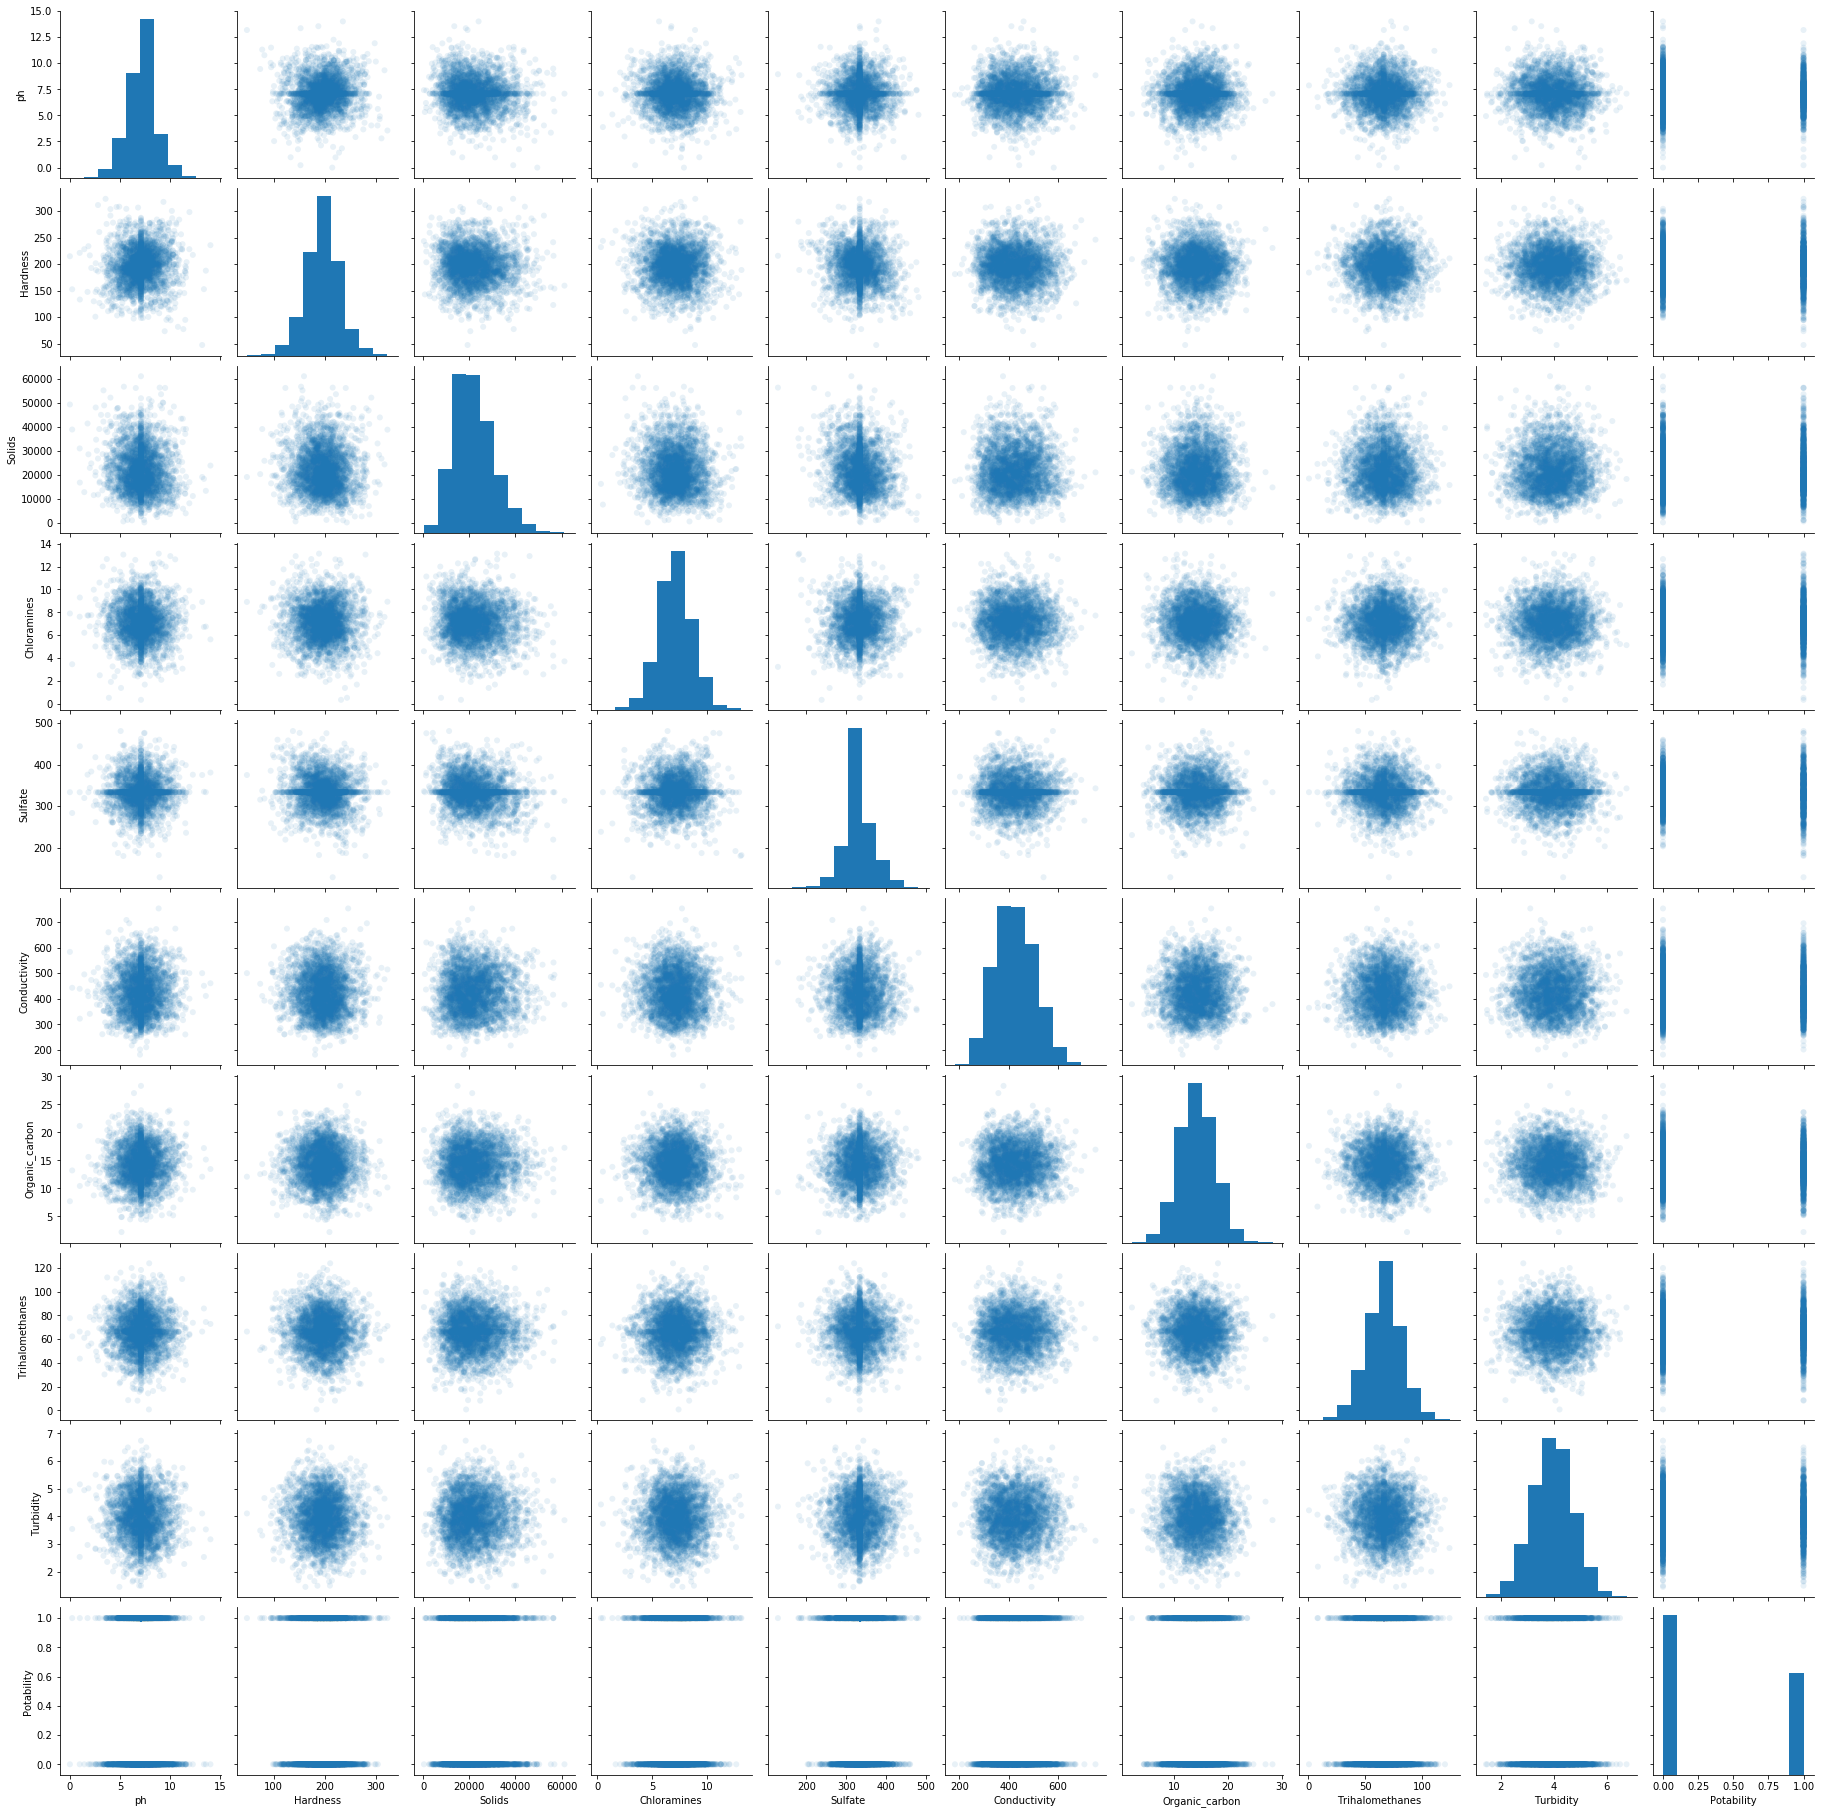

In [9]:
sns.pairplot(df, plot_kws=dict(alpha=.1, edgecolor='none'))

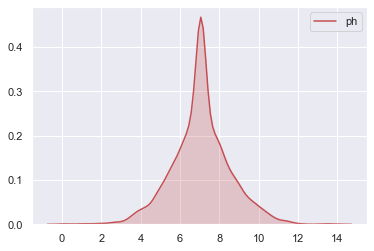

In [10]:
sns.set(style="darkgrid")

fig = sns.kdeplot(df['ph'], shade=True, color="r")
plt.show()

Moreover, I want to see relation between features more clearly. Therefore I am going to use correlation matrix.

In [11]:
corr_matrix = df.corr()
corr_matrix

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


Text(0.5, 1, 'Correlation Between Features')

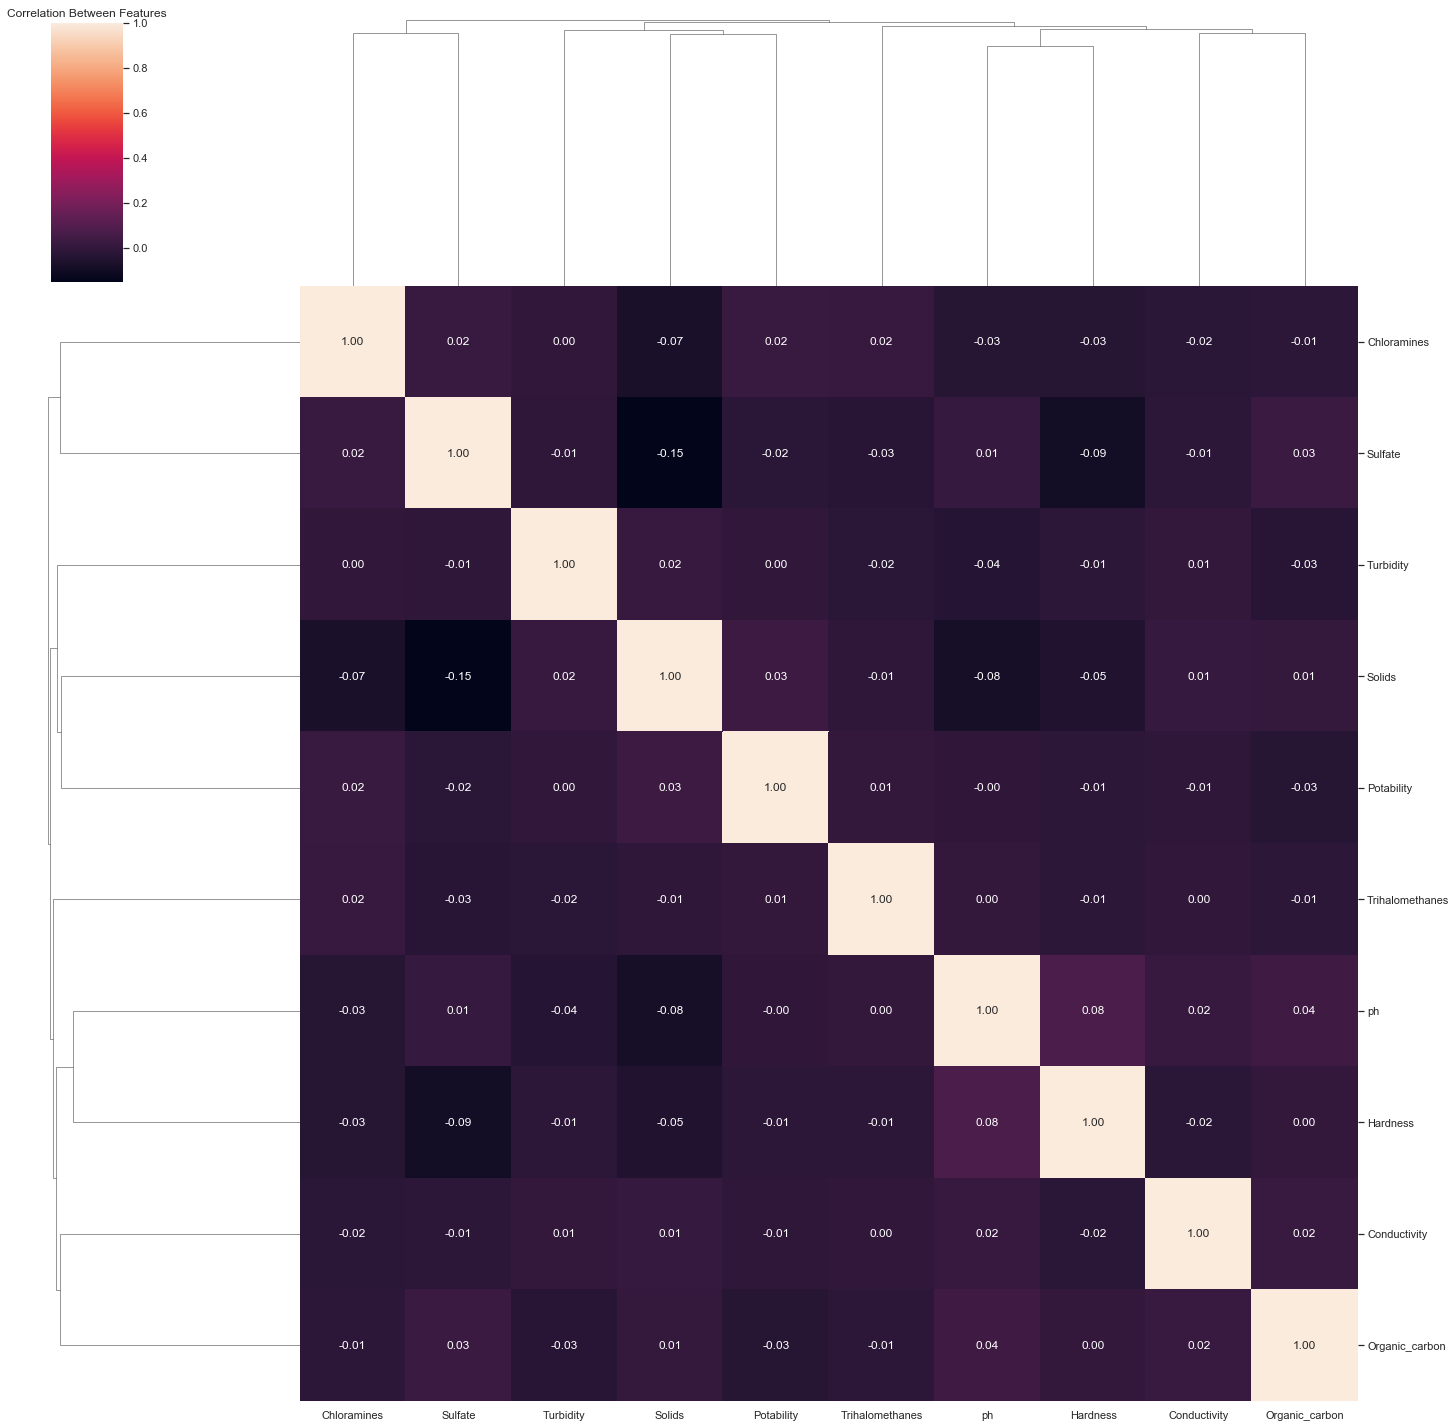

In [12]:
sns.clustermap(corr_matrix, annot = True, fmt = ".2f", figsize = (20,20)) # annot stands for showing numeric values in graph
plt.title("Correlation Between Features")

Hypothesis testing

1)ph has no effect on potability.

In [28]:
from scipy.stats import ttest_ind

In [29]:
df_avg = np.mean(df)
df_avg = df_avg.drop("Potability",0)
df_avg

ph                     7.080795
Hardness             196.369496
Solids             22014.092526
Chloramines            7.122277
Sulfate              333.775777
Conductivity         426.205111
Organic_carbon        14.284970
Trihalomethanes       66.396293
Turbidity              3.966786
dtype: float64

In [45]:
acid = df[df["ph"]<7]["Potability"]
base = df[df["ph"]>7]["Potability"]
ttest, p_val = ttest_ind(acid, base)
print(ttest , p_val)

0.31437587583250015 0.7532556073374688


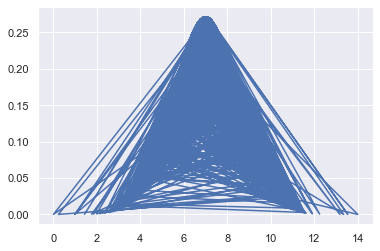

In [44]:
mu = 7
variance = np.var(df["ph"])
sigma = math.sqrt(variance)
plt.plot(df["ph"],stats.norm.pdf(df["ph"], mu, sigma))

In [59]:
lessHardness = df[df["Hardness"]<=170]["Potability"]
moreHardness = df[df["Hardness"]>170]["Potability"]
ttest, p_val = ttest_ind(lessHardness, moreHardness)
print(ttest , p_val)

3.0176880879853867 0.0025667215519665472


In [194]:
midTurb = df[(df["Turbidity"] <= 4) & (df["Turbidity"] >= 3)]["Potability"]
otherTurb = df[(df["Turbidity"] > 4) | (df["Turbidity"] < 3)]["Potability"]
ttest, p_val = ttest_ind(midTurb, otherTurb)
print(ttest , p_val)

0.5726050569744637 0.5669514532312994
